In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('clustered_data.csv')

In [21]:
from sklearn.preprocessing import RobustScaler
robust_scaler=RobustScaler()
df_scaled=robust_scaler.fit_transform(df)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(data=principal_components,columns=['PC1','PC2'])

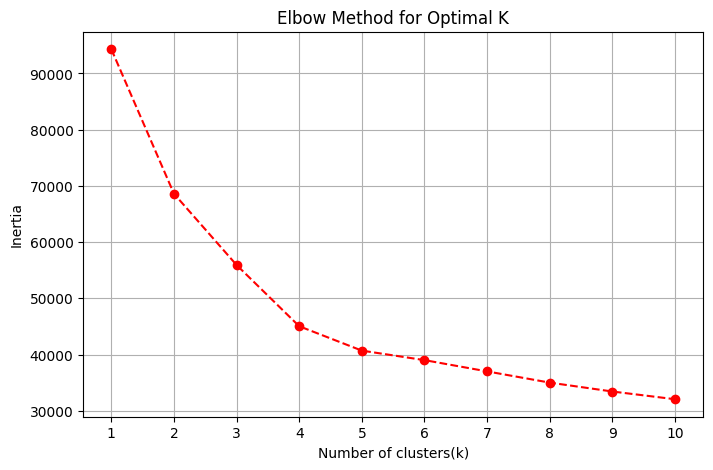

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range=range(1,11)
inertia=[]

for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range,inertia,marker='o',linestyle='--',color='r')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

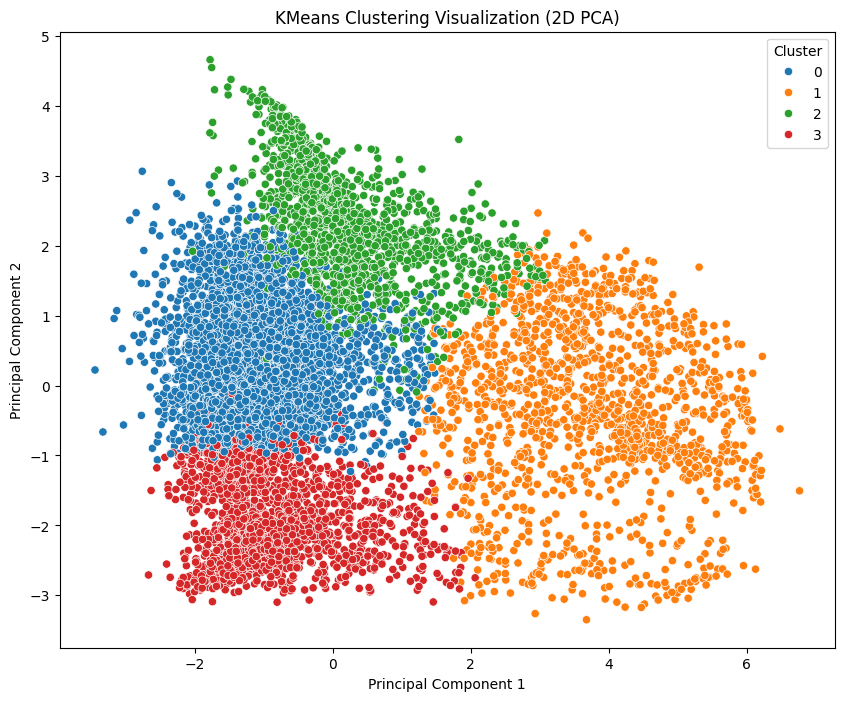

In [23]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=4,random_state=42)
kmeans_labels=kmeans_model.fit_predict(df_scaled)
df_pca['KMeans_Cluster']=kmeans_labels

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1',y='PC2',hue='KMeans_Cluster',data=df_pca,palette='tab10')
plt.title('KMeans Clustering Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.show()

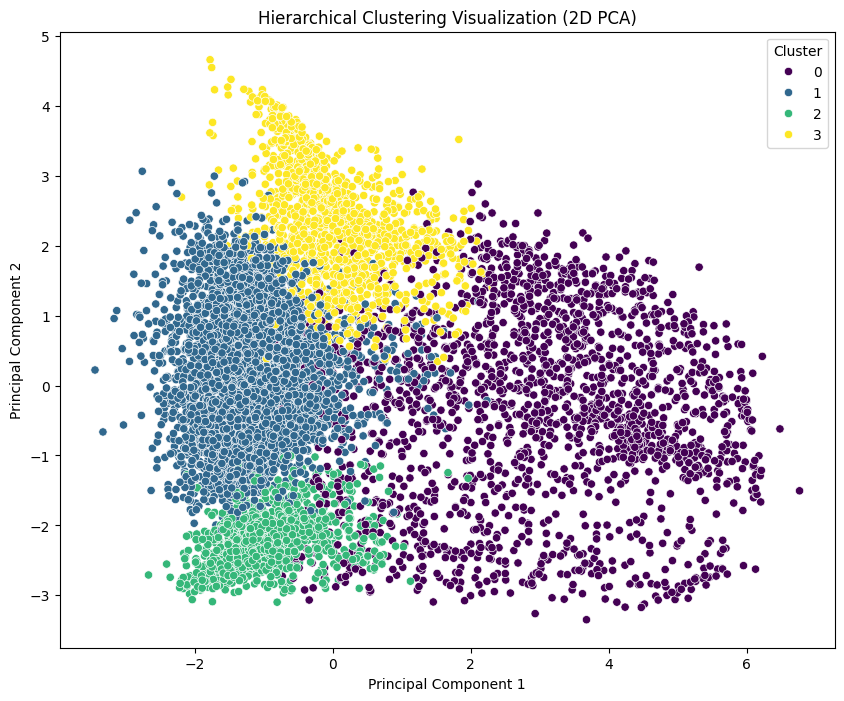

In [24]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_model=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
hierarchical_labels=hierarchical_model.fit_predict(df_scaled)

df_pca['Hierarchical_Cluster']=hierarchical_labels
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1',y='PC2',hue='Hierarchical_Cluster',data=df_pca,palette='viridis')
plt.title('Hierarchical Clustering Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.show()

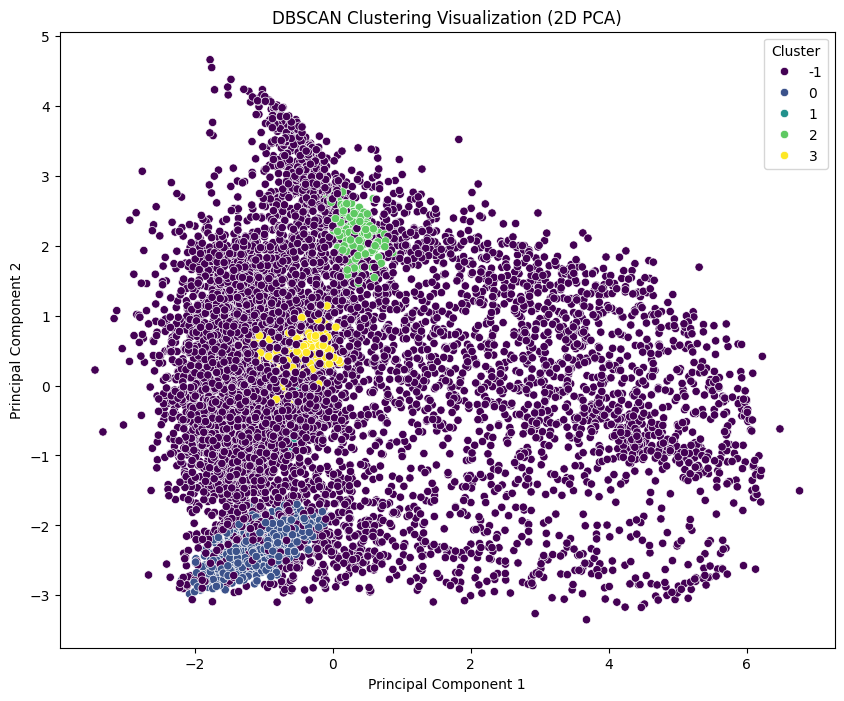

In [25]:
from sklearn.cluster import DBSCAN
dbscan_model=DBSCAN(eps=0.8,min_samples=2*len(df.columns))
dbscan_labels=dbscan_model.fit_predict(df_scaled)
df_pca['DBSCAN_Cluster']=dbscan_labels

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1',y='PC2',hue='DBSCAN_Cluster',data=df_pca,palette='viridis')
plt.title('DBSCAN Clustering Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.show()

In [26]:
models={
    'K-Means': {'labels': kmeans_labels, 'model': kmeans_model},
    'Hierarchical': {'labels': hierarchical_labels, 'model': hierarchical_model},
    'DBSCAN': {'labels': dbscan_labels, 'model': dbscan_model}
}

In [27]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
import numpy as np
import pandas as pd

results=[]

for name,info in models.items():
    labels,model=info['labels'],info['model']
    sil=db=ch=inertia=np.nan
    clusters=len(np.unique(labels))

    if name=="DBSCAN":
        valid=labels!=-1
        if np.unique(labels[valid]).size>=2:
            Xv,Lv=df_scaled[valid],labels[valid]
            sil=silhouette_score(Xv,Lv)
            db=davies_bouldin_score(Xv,Lv)
            ch=calinski_harabasz_score(Xv,Lv)
    else:
        if np.unique(labels).size>=2:
            sil=silhouette_score(df_scaled,labels)
            db=davies_bouldin_score(df_scaled,labels)
            ch=calinski_harabasz_score(df_scaled,labels)
        if name=="K-Means":
            inertia=model.inertia_

    results.append({
        "Model":name,
        "Silhouette":sil,
        "Davies-Bouldin":db,
        "Calinski-Harabasz":ch,
        "Inertia":inertia,
        "Clusters":clusters
    })

results_df=pd.DataFrame(results)
results_df


,Model,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inertia,Clusters
0,K-Means,0.261145,1.311633,3261.971507,45040.191367,4
1,Hierarchical,0.219089,1.339999,2710.546439,NaN,4
2,DBSCAN,0.455183,0.677091,1424.184374,NaN,5


In [28]:
from sklearn.cluster import DBSCAN
import pickle

dbscan_model = DBSCAN(eps=0.5, min_samples=5).fit(df_scaled)

with open("model.pkl", "wb") as f:
    pickle.dump(dbscan_model, f)